## About

Jupyter notebook on Text2Image prepared specifically for LLM 2025 class at University of Washington, Seattle.

In this notebook, we go through the following:

a) Set up for diffusion API

b) Use of diffusion API for image generation

c) Playing with different settings for Stable Diffusion

This is part of LLM Lecture series 2025 at University of Washington, Seattle (https://bytesizeml.github.io/llm2025/).

### 1. Setup

In [1]:
! pip install -U transformers
! pip install datasets evaluate -q
! pip install jiwer -q
! pip install -U accelerate
! pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 43.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.3
    Uninstalling transformers-4.48.3:
      Successfully uninstalled transformers-4.48.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [5]:
# 1. Install Libraries
!pip3 install openai
!pip3 install python-dotenv


# 2. Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
print(os.system('ls'))

os.chdir(os.curdir + "/drive/MyDrive/Colab Notebooks/LLM")

# 3. Open AI API Access Setup
import openai
import os

open_ai_key_file = "openai_api_key.txt" # Your OPEN AI Key in this file
with open(open_ai_key_file, "r") as f:
  for line in f:
    OPENAI_KEY = line
    break

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())



# 4. Open AI text generation APIs
from openai import OpenAI
client = OpenAI(api_key=OPENAI_KEY)
def get_completion_instruct(prompt, model="gpt-3.5-turbo-instruct"):
    response = client.completions.create(
        model=model,
        prompt=prompt
    )
    #return response.choices[0].text
    return response.choices[0].text

def get_completion(prompt, model="gpt-3.5-turbo"):
  message = {"role": "user", "content": prompt}
  response = client.chat.completions.create(
      model=model,
      messages=[message]
  )
  return response.choices[0].message.content


def get_completion_gpt4o(prompt, model="gpt-4o-mini"):
  message = {"role": "user", "content": prompt}
  response = client.chat.completions.create(
      model=model,
      messages=[message]
  )
  return response.choices[0].message.content

Mounted at /content/drive/
0


In [6]:
!pwd

/content/drive/MyDrive/Colab Notebooks/LLM


In [7]:
!ls

 hf_token.txt   Hugging_Face_Inference.ipynb   openai_api_key.txt  'Text2Image - LLM 2025'


## 2. Stability AI demo

In [9]:
## Generates Token and use from hugging face
from huggingface_hub import notebook_login
PATH = "/content/drive/MyDrive/Colab Notebooks/LLM/"
path = PATH + "hf_token.txt"
with open(path, "r") as f:
  HF_TOKEN = f.read()

notebook_login()

In [10]:
!pip uninstall diffusers
!pip cache purge
!pip install diffusers==0.27.0
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"
!wget https://raw.githubusercontent.com/huggingface/diffusers/4674fdf807cdefd4db1758067c0207872d805f8c/examples/inference/image_to_image.py
!pip install wget

Found existing installation: diffusers 0.32.2
Uninstalling diffusers-0.32.2:
  Would remove:
    /usr/local/bin/diffusers-cli
    /usr/local/lib/python3.11/dist-packages/diffusers-0.32.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/diffusers/*
Proceed (Y/n)? Y
  Successfully uninstalled diffusers-0.32.2
Files removed: 120
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.3 MB/s eta 0:00:00
--2025-02-27 06:27:07--  https://raw.githubusercontent.com/huggingface/diffusers/4674fdf807cdefd4db1758067c0207872d805f8c/examples/inference/image_to_image.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 503 Backe

In [1]:
from google.colab import output
from pathlib import Path
from PIL import Image
import torch
!pip install --upgrade huggingface-hub==0.26.2 transformers==4.46.1 tokenizers==0.20.1 diffusers==0.31.0 # This combo is needed to correctly load the StableDiffusionPipeline
from diffusers import StableDiffusionPipeline
import requests
import getpass
from io import BytesIO
#from image_to_image import StableDiffusionImg2ImgPipeline, preprocess
import os, wget

output.enable_custom_widget_manager()
cache_drive = False

### 2a. Text 2 Image Synthesis

In [2]:
# Helping function for plotting images in a 2D grid
from PIL import Image
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [3]:
!ls

drive  sample_data


## 2b. Load Model

In [4]:
#from huggingface_hub import notebook_login
#notebook_login()

import torch
from diffusers import StableDiffusionPipeline

device = "cuda" #using a gpu
model_id = "CompVis/stable-diffusion-v1-4"

pipe_txt2image = StableDiffusionPipeline.from_pretrained(
    model_id,
    revision="fp16",
    torch_dtype=torch.float16,
).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:221: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)oints%2Fscheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

safety_checker%2Fconfig.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28

## 2c. Model *Inference*

  0%|          | 0/50 [00:00<?, ?it/s]

length of images =  4


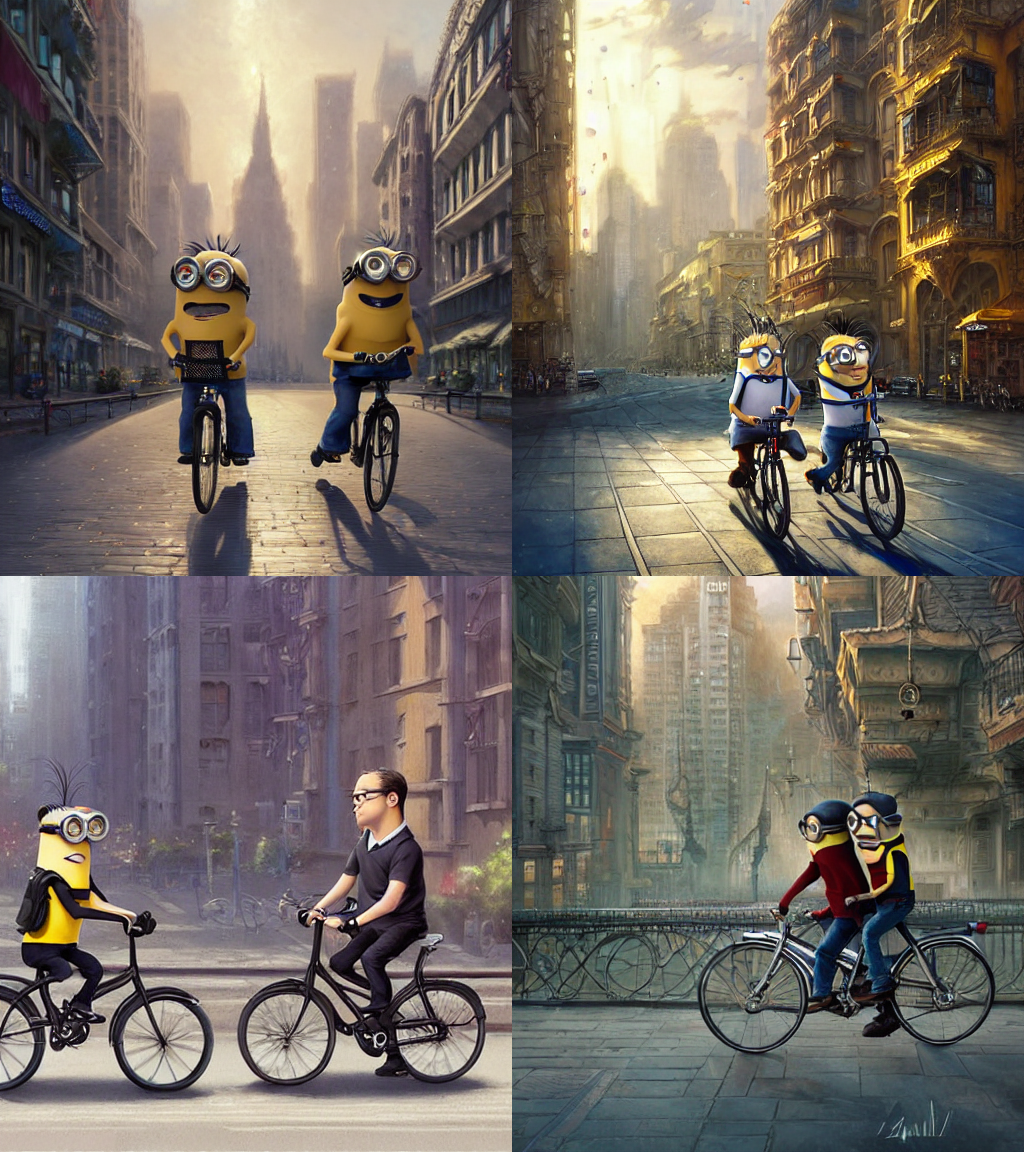

In [5]:
#@title ### 2c. Stable Diffusion txt2img
prompt = "Two minions riding a bicycle in the city, with the Guru, tone mapped, shiny, intricate, cinematic lighting, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by terry moore and greg rutkowski" #@param {type:"string"}

#@markdown Height of the Image:
H = 576 #@param {type:"slider", min:256, max:1024, step:64}

#@markdown Width of the Image:
W = 512 #@param {type:"slider", min:256, max:1024, step:64}

#@markdown Number of images to generate:
n = 4 #@param {type:"integer"}

#@markdown Seed:
seed = 3 #@param {type:"integer"}

#@markdown Steps to generate the image(lower number->faster but crappier image):
steps = 50 #@param {type:"slider", min:1, max:150, step:1}

#@markdown How strong your text prompt should influence the image(default 7.5)
guidance_scale = 7.5 #@param {type:"slider", min:6, max:15, step:0.1}

#@markdown ### Display Settings
show_grid = True #@param {type:"boolean"}
#@markdown If you have `show_grid` enabled, make sure `n = rows*columns`
#@markdown , Ignore if you have `show_grid` disabled.

prompt = [prompt] * n
generator = torch.Generator("cuda").manual_seed(seed)
with torch.autocast("cuda"):
    images = pipe_txt2image(prompt, num_inference_steps=steps, height=H, width=W, guidance_scale=guidance_scale)["images"]
    print("length of images = ", len(images))
    del generator

if show_grid:
    rows = 2 #@param {type:"integer"}
    columns = 2 #@param {type:"integer"}

    grid = image_grid(images, rows=rows, cols=columns)
    display(grid)

## ICE 1

Play around with the image data set above and:

a) Test the image generation for a really small steps vs large steps - What difference do you notice?
b) Test the image generation with a high guidance scale vs a low guidane scale - What do you notice?

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating images...


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

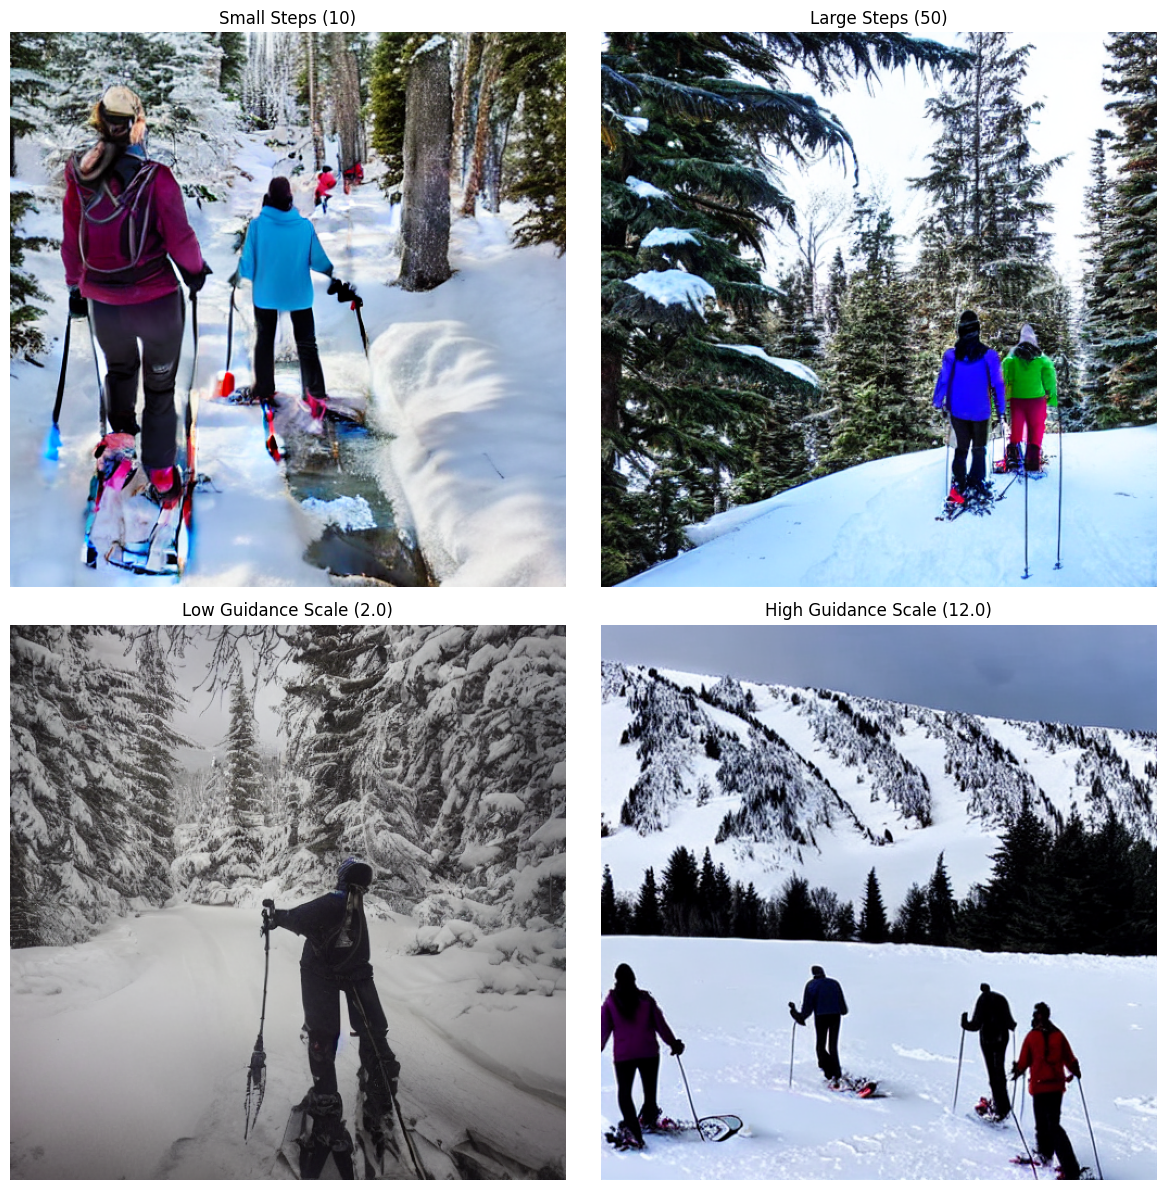

Images saved successfully!


In [9]:
## YOUR CODE HERE
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to(device)

prompt = "We go snowshoeing in seattle snow mountain"

small_steps = 10
large_steps = 50

low_guidance = 2.0
high_guidance = 12.0

print("Generating images...")

image_small_steps = pipe(prompt, num_inference_steps=small_steps, guidance_scale=7.5).images[0]
image_large_steps = pipe(prompt, num_inference_steps=large_steps, guidance_scale=7.5).images[0]

image_low_guidance = pipe(prompt, num_inference_steps=30, guidance_scale=low_guidance).images[0]
image_high_guidance = pipe(prompt, num_inference_steps=30, guidance_scale=high_guidance).images[0]


fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].imshow(image_small_steps)
axes[0, 0].set_title(f"Small Steps ({small_steps})")

axes[0, 1].imshow(image_large_steps)
axes[0, 1].set_title(f"Large Steps ({large_steps})")

axes[1, 0].imshow(image_low_guidance)
axes[1, 0].set_title(f"Low Guidance Scale ({low_guidance})")

axes[1, 1].imshow(image_high_guidance)
axes[1, 1].set_title(f"High Guidance Scale ({high_guidance})")

for ax in axes.flatten():
    ax.axis("off")

plt.tight_layout()
plt.show()

# **步驟：儲存圖片**
image_small_steps.save("/content/drive/MyDrive/Colab Notebooks/LLM/small_steps.jpg")
image_large_steps.save("/content/drive/MyDrive/Colab Notebooks/LLM/large_steps.jpg")
image_low_guidance.save("/content/drive/MyDrive/Colab Notebooks/LLM/low_guidance.jpg")
image_high_guidance.save("/content/drive/MyDrive/Colab Notebooks/LLM/high_guidance.jpg")

print("Images saved successfully!")

(a) Small Steps vs Large Steps

With small steps (10), the image lacks details, looks a bit blurry, and has less texture. With large steps (50), the details are much sharper, colors blend better, and the image looks more realistic. More steps help refine the image, but too many might not improve it significantly.

(b) Low vs High Guidance Scale

With low guidance (2.0), the image feels more creative and natural but might not match the prompt well. With high guidance (12.0), it follows the prompt strictly, making colors super vibrant and details sharper, but sometimes it looks overprocessed. A balanced scale gives the best results!

## ICE 2

Imagine now that you want to use the starter image as a background and generate an image corrposnding to each caption with the background as a starter iamge.

For example: For the 4th image above - Generate minions with the background of the ocean and mountains.

How would your use of Stability APIs change? What would be a creative prompt that can get the job done here?

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (85 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['is futuristic and sci - fi inspired .']


  0%|          | 0/45 [00:00<?, ?it/s]

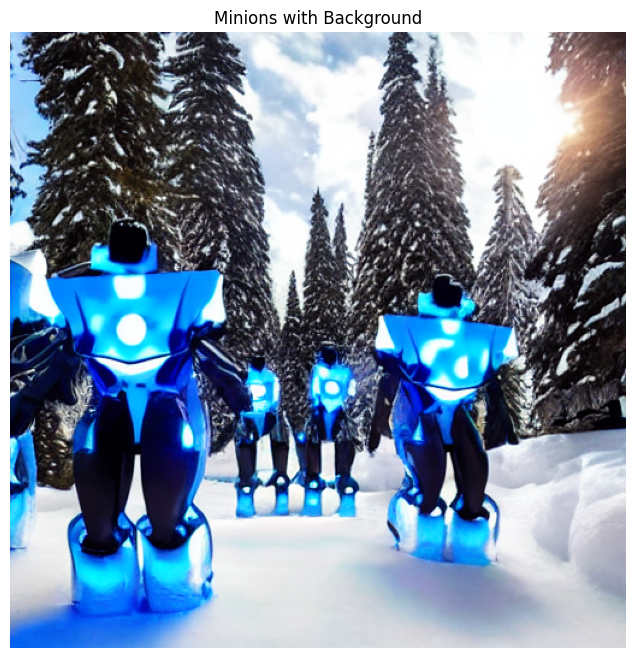

In [12]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
import PIL
import requests
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to(device)

starter_image_path = "/content/drive/MyDrive/Colab Notebooks/LLM/large_steps.jpg"
starter_image = PIL.Image.open(starter_image_path).convert("RGB").resize((512, 512))

prompt = "A An army of futuristic humanoid robots wearing high-tech snowshoes, marching through the snowy mountains. Their metallic bodies shine under the bright winter sun, and glowing blue visors cover their faces. Behind them, a fleet of Cybertrucks with neon headlights carves through the snow, kicking up ice and powder. The background remains a majestic snowy mountain range, but the atmosphere is futuristic and sci-fi inspired."

strength = 0.9
guidance_scale = 7.5
image = pipe(prompt=prompt, image=starter_image, strength=strength, guidance_scale=guidance_scale).images[0]

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Minions with Background")
plt.show()
